## Predict Brown Dwarf Parameters Using K-Means Clustering

## Step 1: Importing Libraries and Setting Up

We start by importing essential libraries:
- `pandas` and `numpy` for data manipulation and numerical operations.
- `streamlit` to create an interactive web platform for visualization.
- `sklearn` for machine learning tasks such as scaling, PCA, and K-Means clustering.
- `matplotlib` for plotting graphs.

We also set the random seed for reproducibility, which ensures that results are consistent across multiple runs.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(seed=100)


## Step 2: Loading the Data

In this step, we load the Brown Dwarf dataset using the `pandas` library. The dataset contains spectral data for multiple observations. The target variables (or outputs) include:
- Gravity (`gravity`)
- Temperature (`temperature`)
- Carbon-to-oxygen ratio (`c_o_ratio`)
- Metallicity (`metallicity`)

The wavelengths serve as the input features.


In [2]:
# Define the reference data path
__reference_data_path__ = os.getenv("TelescopeML_reference_data")

# If the environment variable is not set, manually set the path
if not __reference_data_path__:
    __reference_data_path__ = "D:/Nasa/TelescopeML_project/reference_data"

In [3]:
# Load the training dataset
train_BD = pd.read_csv(
    os.path.join(
        __reference_data_path__,
        'training_datasets',
        'browndwarf_R100_v4_newWL_v3.csv.bz2'
    ),
    compression='bz2'
)
train_BD

gravity  temperature  c_o_ratio  metallicity         2.512  \
0         5.00         1100       0.25         -1.0  9.103045e-08   
1         5.00         1100       0.25         -0.7  9.103045e-08   
2         5.00         1100       0.25         -0.5  9.103045e-08   
3         5.00         1100       0.25         -0.3  9.103045e-08   
4         5.00         1100       0.25          0.0  9.103045e-08   
...        ...          ...        ...          ...           ...   
30883     3.25         1000       2.50          0.7  1.533414e-08   
30884     3.25         1000       2.50          1.0  6.942763e-09   
30885     3.25         1000       2.50          1.3  3.758895e-09   
30886     3.25         1000       2.50          1.7  3.150169e-09   
30887     3.25         1000       2.50          2.0  2.665630e-09   

              2.487         2.462         2.438         2.413         2.389  \
0      1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08   
1      1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08   
2      1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08   
3      1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08   
4      1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08   
...             ...           ...           ...           ...           ...   
30883  1.244438e-08  7.703017e-09  5.262130e-09  4.671165e-09  3.026652e-09   
30884  5.536744e-09  3.501408e-09  2.445445e-09  2.168689e-09  1.477159e-09   
30885  2.988295e-09  1.968653e-09  1.417744e-09  1.260679e-09  9.059680e-10   
30886  2.503614e-09  1.672564e-09  1.218379e-09  1.085002e-09  7.942492e-10   
30887  2.117952e-09  1.434730e-09  1.055994e-09  9.418247e-10  7.020869e-10   

       ...         0.981         0.971         0.962         0.952  \
0      ...  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08   
1      ...  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08   
2      ...  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08   
3      ...  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08   
4      ...  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08   
...    ...           ...           ...           ...           ...   
30883  ...  2.064408e-08  1.919290e-08  1.685050e-08  1.772466e-08   
30884  ...  4.353813e-09  4.401064e-09  4.029425e-09  4.482797e-09   
30885  ...  1.546743e-09  1.698977e-09  1.577032e-09  1.813035e-09   
30886  ...  1.332727e-09  1.481450e-09  1.346700e-09  1.538485e-09   
30887  ...  1.533098e-09  1.647372e-09  1.385020e-09  1.517044e-09   

              0.943         0.933         0.924         0.915         0.906  \
0      6.247359e-08  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08   
1      6.247359e-08  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08   
2      6.247359e-08  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08   
3      6.247359e-08  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08   
4      6.247359e-08  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08   
...             ...           ...           ...           ...           ...   
30883  1.726968e-08  1.341722e-08  1.365819e-08  8.811601e-09  4.752807e-09   
30884  4.647158e-09  3.722947e-09  3.825720e-09  1.921753e-09  8.112957e-10   
30885  1.915084e-09  1.497190e-09  1.512469e-09  5.734859e-10  1.823897e-10   
30886  1.608156e-09  1.223594e-09  1.254078e-09  4.561500e-10  1.370389e-10   
30887  1.524311e-09  1.096679e-09  1.209663e-09  4.837326e-10  1.534210e-10   

              0.897  
0      2.791689e-08  
1      2.791689e-08  
2      2.791689e-08  
3      2.791689e-08  
4      2.791689e-08  
...             ...  
30883  2.206752e-09  
30884  3.211086e-10  
30885  6.218672e-11  
30886  4.616465e-11  
30887  5.612844e-11  

[30888 rows x 108 columns]

In [4]:
# Output variable names
output_names = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']

In [5]:
# Show the output table setup
print("Output variables:")
display(train_BD[output_names].head())

Output variables:


gravity  temperature  c_o_ratio  metallicity
0      5.0         1100       0.25         -1.0
1      5.0         1100       0.25         -0.7
2      5.0         1100       0.25         -0.5
3      5.0         1100       0.25         -0.3
4      5.0         1100       0.25          0.0

In [6]:
# Input feature names (wavelengths)
wavelength_names = [col for col in train_BD.columns if col not in output_names]
print("\nInput features (wavelengths):")
print(wavelength_names[:5])


Input features (wavelengths):
['2.512', '2.487', '2.462', '2.438', '2.413']


In [7]:
# Training feature variables (input features)
X = train_BD.drop(columns=output_names)
X

2.512         2.487         2.462         2.438         2.413  \
0      9.103045e-08  1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07   
1      9.103045e-08  1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07   
2      9.103045e-08  1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07   
3      9.103045e-08  1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07   
4      9.103045e-08  1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07   
...             ...           ...           ...           ...           ...   
30883  1.533414e-08  1.244438e-08  7.703017e-09  5.262130e-09  4.671165e-09   
30884  6.942763e-09  5.536744e-09  3.501408e-09  2.445445e-09  2.168689e-09   
30885  3.758895e-09  2.988295e-09  1.968653e-09  1.417744e-09  1.260679e-09   
30886  3.150169e-09  2.503614e-09  1.672564e-09  1.218379e-09  1.085002e-09   
30887  2.665630e-09  2.117952e-09  1.434730e-09  1.055994e-09  9.418247e-10   

              2.389         2.366         2.342         2.319         2.296  \
0      8.925110e-08  8.548790e-08  6.015843e-08  9.539690e-08  7.383212e-08   
1      8.925110e-08  8.548790e-08  6.015843e-08  9.539690e-08  7.383212e-08   
2      8.925110e-08  8.548790e-08  6.015843e-08  9.539690e-08  7.383212e-08   
3      8.925110e-08  8.548790e-08  6.015843e-08  9.539690e-08  7.383212e-08   
4      8.925110e-08  8.548790e-08  6.015843e-08  9.539690e-08  7.383212e-08   
...             ...           ...           ...           ...           ...   
30883  3.026652e-09  2.526892e-09  1.706812e-09  2.182587e-09  1.626858e-09   
30884  1.477159e-09  1.218503e-09  8.860334e-10  1.026081e-09  8.027036e-10   
30885  9.059680e-10  7.536927e-10  5.819125e-10  6.249436e-10  5.088080e-10   
30886  7.942492e-10  6.649941e-10  5.226804e-10  5.493740e-10  4.528844e-10   
30887  7.020869e-10  5.921554e-10  4.729735e-10  4.877480e-10  4.065529e-10   

       ...         0.981         0.971         0.962         0.952  \
0      ...  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08   
1      ...  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08   
2      ...  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08   
3      ...  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08   
4      ...  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08   
...    ...           ...           ...           ...           ...   
30883  ...  2.064408e-08  1.919290e-08  1.685050e-08  1.772466e-08   
30884  ...  4.353813e-09  4.401064e-09  4.029425e-09  4.482797e-09   
30885  ...  1.546743e-09  1.698977e-09  1.577032e-09  1.813035e-09   
30886  ...  1.332727e-09  1.481450e-09  1.346700e-09  1.538485e-09   
30887  ...  1.533098e-09  1.647372e-09  1.385020e-09  1.517044e-09   

              0.943         0.933         0.924         0.915         0.906  \
0      6.247359e-08  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08   
1      6.247359e-08  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08   
2      6.247359e-08  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08   
3      6.247359e-08  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08   
4      6.247359e-08  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08   
...             ...           ...           ...           ...           ...   
30883  1.726968e-08  1.341722e-08  1.365819e-08  8.811601e-09  4.752807e-09   
30884  4.647158e-09  3.722947e-09  3.825720e-09  1.921753e-09  8.112957e-10   
30885  1.915084e-09  1.497190e-09  1.512469e-09  5.734859e-10  1.823897e-10   
30886  1.608156e-09  1.223594e-09  1.254078e-09  4.561500e-10  1.370389e-10   
30887  1.524311e-09  1.096679e-09  1.209663e-09  4.837326e-10  1.534210e-10   

              0.897  
0      2.791689e-08  
1      2.791689e-08  
2      2.791689e-08  
3      2.791689e-08  
4      2.791689e-08  
...             ...  
30883  2.206752e-09  
30884  3.211086e-10  
30885  6.218672e-11  
30886  4.616465e-11  
30887  5.612844e-11  

[30888 rows x 104 columns]

In [8]:
# Target/Output feature variables
y = train_BD[output_names]
y

gravity  temperature  c_o_ratio  metallicity
0         5.00         1100       0.25         -1.0
1         5.00         1100       0.25         -0.7
2         5.00         1100       0.25         -0.5
3         5.00         1100       0.25         -0.3
4         5.00         1100       0.25          0.0
...        ...          ...        ...          ...
30883     3.25         1000       2.50          0.7
30884     3.25         1000       2.50          1.0
30885     3.25         1000       2.50          1.3
30886     3.25         1000       2.50          1.7
30887     3.25         1000       2.50          2.0

[30888 rows x 4 columns]

In [9]:
# Print the number of input features and output variables
print("\nNumber of input features (wavelengths):", X.shape[1])
print("Number of output variables:", y.shape[1])


Number of input features (wavelengths): 104
Number of output variables: 4


In [10]:
# Convert data types to float32
X = X.astype(np.float32)
y = y.astype(np.float32)

## Step 3: Splitting the Data

The dataset is split into three parts:
- **Training set**: Used to train the machine learning model (60% of the data).
- **Cross-validation set**: Used to tune hyperparameters and prevent overfitting (20%).
- **Test set**: Used to evaluate the final model’s performance (20%).

We use the `train_test_split` function from `sklearn` for this.


In [11]:
# Split data: 60% training, 20% cross-validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train, X_cv, y_train, y_cv = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42  # 0.25 x 0.8 = 0.2
)

In [12]:
# Verify the sizes
assert len(X_train) + len(X_cv) + len(X_test) == len(X), "Data splitting error"
print(f"\nTraining set size: {len(X_train)}")
print(f"Cross-validation set size: {len(X_cv)}")
print(f"Test set size: {len(X_test)}")


Training set size: 18532
Cross-validation set size: 6178
Test set size: 6178


## Step 4: Quartile-Based Data Grouping and K-Means Clustering

In this step, we use a function to divide the data into quartiles or groups based on the optimal number of clusters (k) determined earlier. The goal is to divide the dataset into groups such as low, lower-middle, upper-middle, and high, depending on the values of the input features (in this case, the wavelengths).

### Understanding Quartiles
Quartiles are values that divide a dataset into four equal parts, or four groups, each containing 25% of the data points:
1. **Low Quartile (Q1)**: This group contains data points with the smallest values (bottom 25%).
2. **Lower-Middle Quartile (Q2)**: This group contains data points between 25% and 50%.
3. **Upper-Middle Quartile (Q3)**: This group contains data points between 50% and 75%.
4. **High Quartile (Q4)**: This group contains data points with the largest values (top 25%).

In this example, the quartiles will be applied to the **wavelength values**, and each group will represent a portion of the dataset. For example:
- The **low** quartile will contain the smallest wavelengths from around 0.8967 μm (minimum) to 1.1984 μm.
- The **lower-middle** quartile will contain wavelengths between 1.1984 μm (excluded) to 1.5388 μm.

These boundaries are dynamically calculated for each feature using the training data.

### K-Means Algorithm with Quartiles
After dividing the data into quartiles, we randomly choose k rows (where k is the number of clusters) to represent the initial centroids for the K-Means clustering algorithm. This ensures that each quartile has its own representation in the clustering process.

The K-Means algorithm will:
1. **Initialize the centroids**: We pick k random rows as centroids.
2. **Assign clusters**: The dataset is divided based on the shortest Euclidean distance to the centroids. Euclidean distance is calculated using the summation of the squares of the differences between the data points and the centroids (i.e., using axis=1).
3. **Recompute the centroids**: Once clusters are assigned, the centroids are updated based on the mean of the data points in each cluster.

This process repeats until the centroids no longer change, indicating convergence.

### Function: `compute_quartile_labels`

The `compute_quartile_labels` function helps divide the data into quartiles:
- It takes the input data and calculates the quartiles.
- Based on these quartile values, it assigns labels to the data points, indicating which quartile each data point belongs to (0 for low, 1 for lower-middle, 2 for upper-middle, and 3 for high).

In [13]:
# Function to compute quartile labels using training data thresholds
def compute_quartile_labels(y_df, quartile_thresholds=None):
    y_quartiles = y_df.copy()
    quartile_labels = {}
    for col in y_df.columns:
        if quartile_thresholds and col in quartile_thresholds:
            quartiles = quartile_thresholds[col]
        else:
            # Compute quartiles on the training data
            quartiles = np.quantile(y_train[col], [0.25, 0.5, 0.75])
        # Assign labels based on quartiles
        y_quartiles[col + '_quartile'] = pd.cut(
            y_df[col],
            bins=[-np.inf, quartiles[0], quartiles[1], quartiles[2], np.inf],
            labels=[0, 1, 2, 3]
        )
        quartile_labels[col] = quartiles
    return y_quartiles, quartile_labels

In [14]:
# Compute quartile labels and thresholds for training data
y_train_quartiles, quartile_thresholds = compute_quartile_labels(y_train)

# Display quartile thresholds
print("\nQuartile thresholds for output variables (training data):")
for col in output_names:
    print(f"{col}: {quartile_thresholds[col]}")


Quartile thresholds for output variables (training data):
gravity: [3.5  4.25 5.  ]
temperature: [ 425.  750. 1500.]
c_o_ratio: [0.5 1.5 2. ]
metallicity: [-0.5  0.5  1. ]


## Step 5: Scaling the Data

Before applying machine learning algorithms, it is important to scale the features so that all variables contribute equally to the model. We use `StandardScaler` to normalize the input data to have a mean of 0 and standard deviation of 1.

In [67]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

## Step 6: Dimensionality Reduction with PCA

Since we have a large number of input features (wavelengths), we apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. PCA captures the most important variance in the data while reducing the number of features.

We use the `explained_variance_ratio_` to determine how much variance is retained with each component, and select enough components to retain 95% of the variance in the dataset.

In [68]:
# Fit PCA on the training data without specifying n_components
pca_full = PCA()
pca_full.fit(X_train_scaled)

PCA()

In [69]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find the number of components that explain at least 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # Add 1 because index starts at 0

print(f"\nNumber of PCA components to retain 95% variance: {n_components}")


Number of PCA components to retain 95% variance: 2


In [70]:
# Apply PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_cv_pca = pca.transform(X_cv_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA applied, reduced data shape: {X_train_pca.shape}")

PCA applied, reduced data shape: (18532, 2)


## Step 7: Elbow Method for Optimal Clusters

The Elbow Method is used to find the optimal number of clusters (k) for the K-Means algorithm. We calculate the "inertia" (sum of squared distances from each point to its assigned centroid) for different values of k. The point at which inertia stops decreasing significantly is considered the "elbow," which indicates the optimal number of clusters.

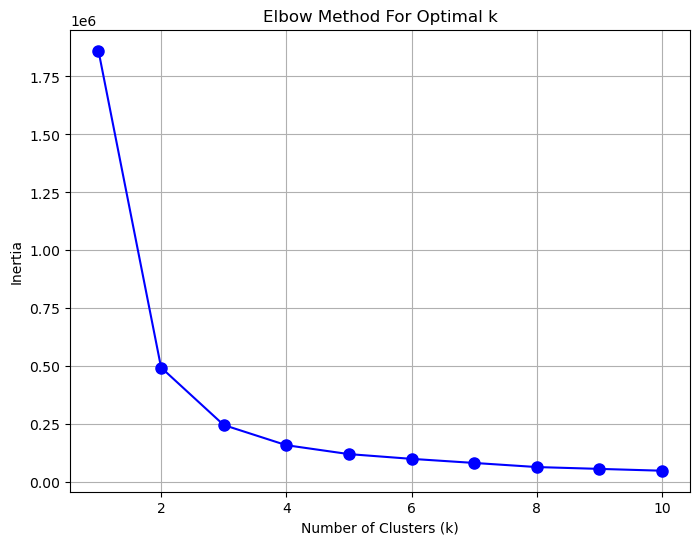

In [71]:
# Elbow method to find optimal k
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertias, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [74]:
# Option for the user to change the number of centroid clusters
optimal_k = 4 #Enter the optimal number of clusters based on the elbow plot
print(f"\nOptimal number of clusters selected: {optimal_k}")


Optimal number of clusters selected: 4


In [76]:
def plot_progress_kMeans(X, centroids, previous_centroids, labels, K, iter_num):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, linewidths=3)
    for j in range(K):
        plt.plot([previous_centroids[j, 0], centroids[j, 0]],
                 [previous_centroids[j, 1], centroids[j, 1]], 'k-', lw=2)
    plt.title(f'Iteration {iter_num + 1}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()
    plt.pause(0.1)
    plt.close()

## Step 8: Applying K-Means Clustering

After determining the optimal number of clusters using the Elbow Method, we apply the K-Means algorithm. The K-Means algorithm works by:
1. Initializing centroids randomly.
2. Assigning data points to the nearest centroid.
3. Recalculating the centroid positions.
4. Repeating steps 2 and 3 until the centroids converge.

In this step, we also visualize the clustering results and observe the clusters formed based on the PCA-reduced data.

In [77]:
def run_kMeans(X, K, max_iters=10):
    # Initialize centroids randomly from the dataset
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[indices]
    previous_centroids = centroids.copy()
    
    for i in range(max_iters):
        # Assign clusters using Euclidean distance
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Plot progress
        plot_progress_kMeans(X, centroids, previous_centroids, labels, K, i)
        
        # Update centroids
        previous_centroids = centroids.copy()
        for k in range(K):
            points = X[labels == k]
            if len(points) > 0:
                centroids[k] = points.mean(axis=0)
            else:
                # Reinitialize centroid if no points are assigned
                centroids[k] = X[np.random.choice(X.shape[0])]
    return centroids, labels

## Step 9: Evaluating Model Performance

Finally, we evaluate the model by predicting the quartile labels for each cluster and comparing the predicted values with the true values for the output variables. We calculate the accuracy of the predictions for each output variable and visualize the results.

Additionally, we compare the accuracy of the model before and after applying PCA to see how dimensionality reduction impacts the performance.

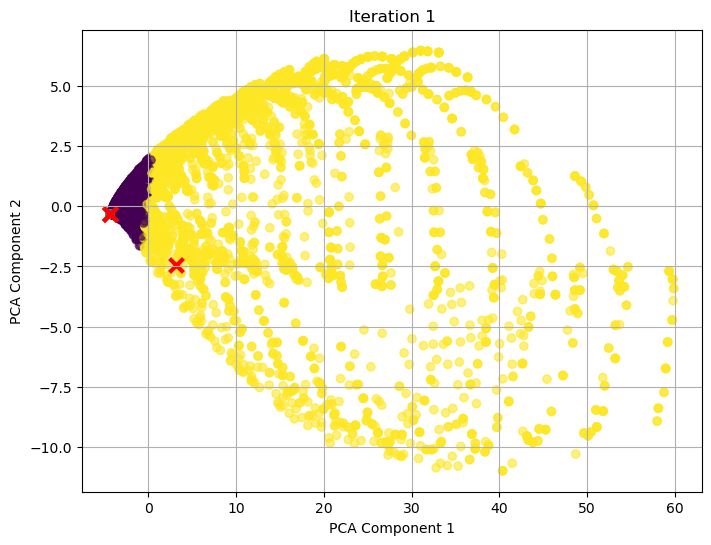

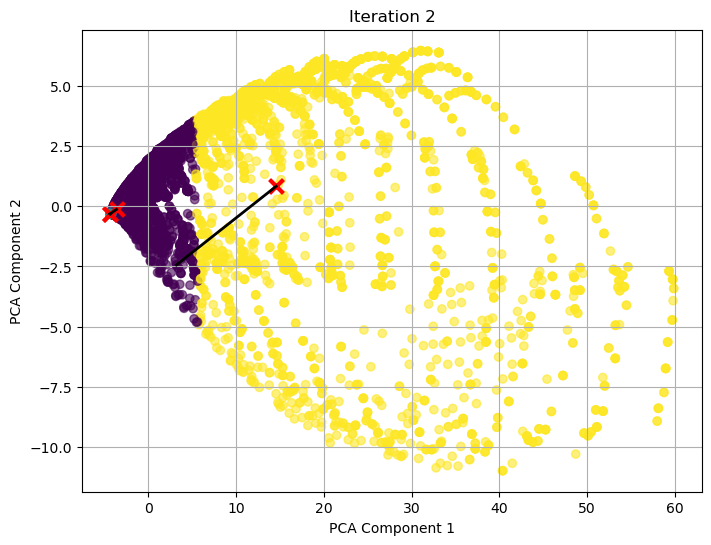

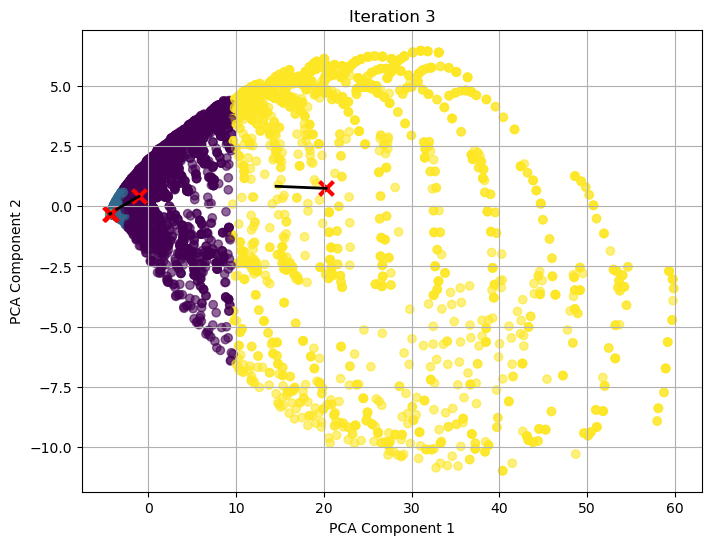

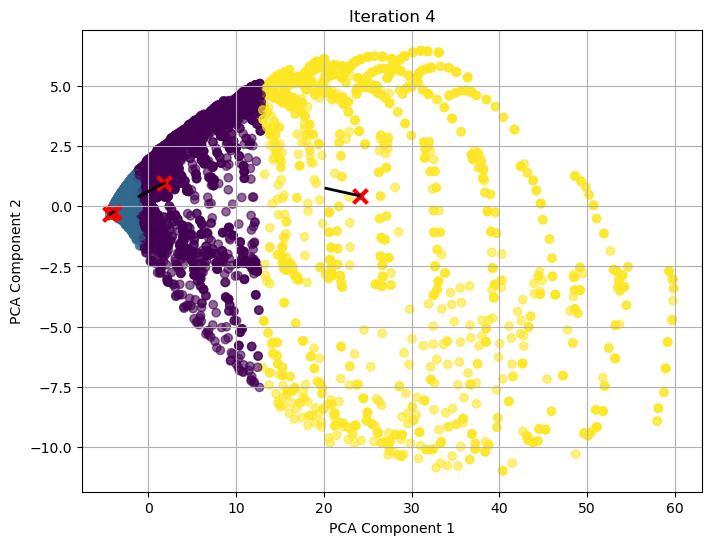

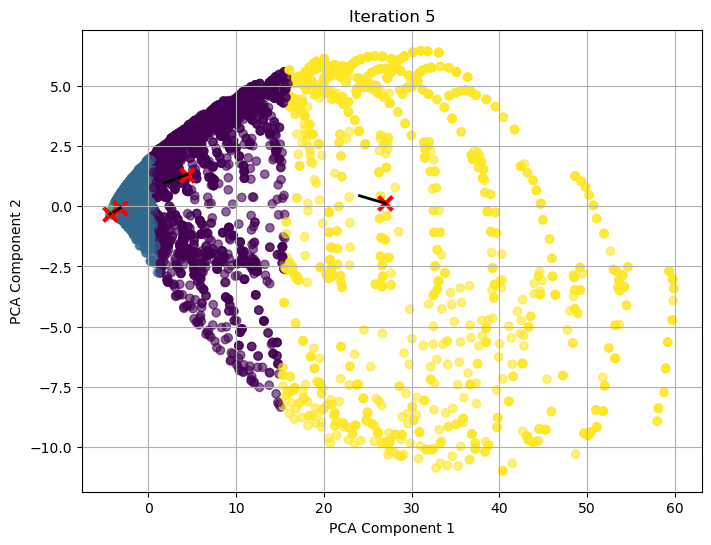

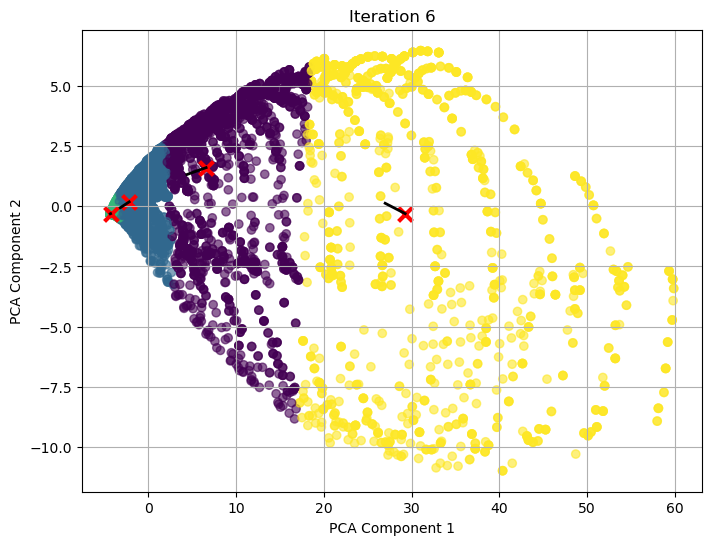

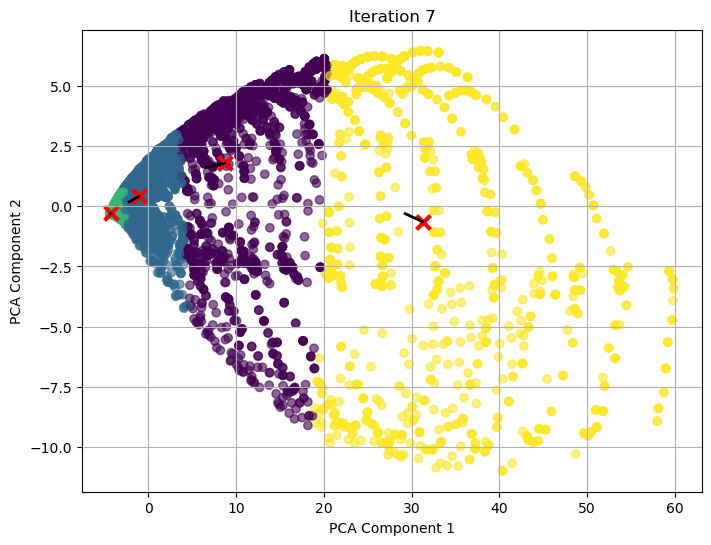

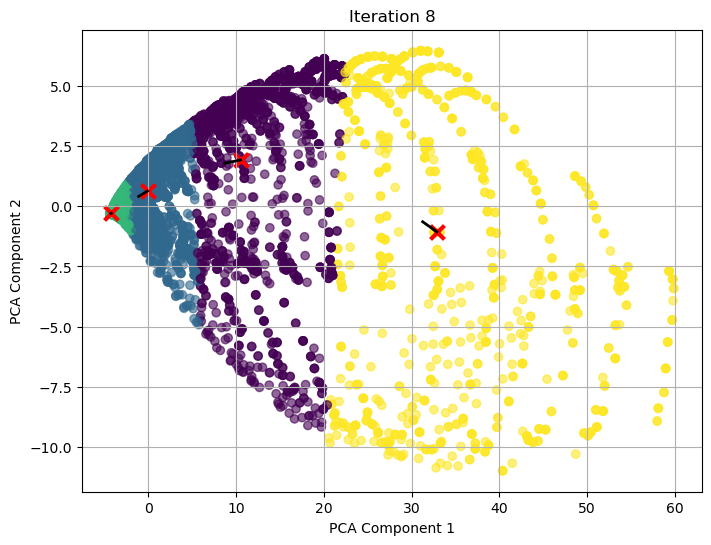

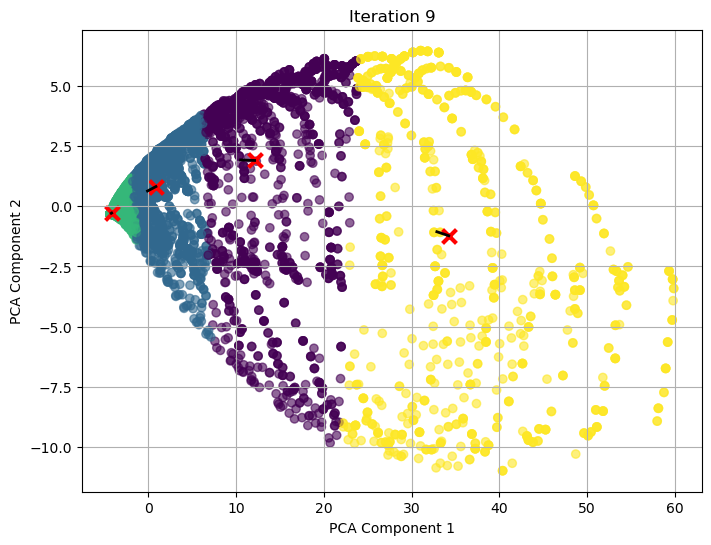

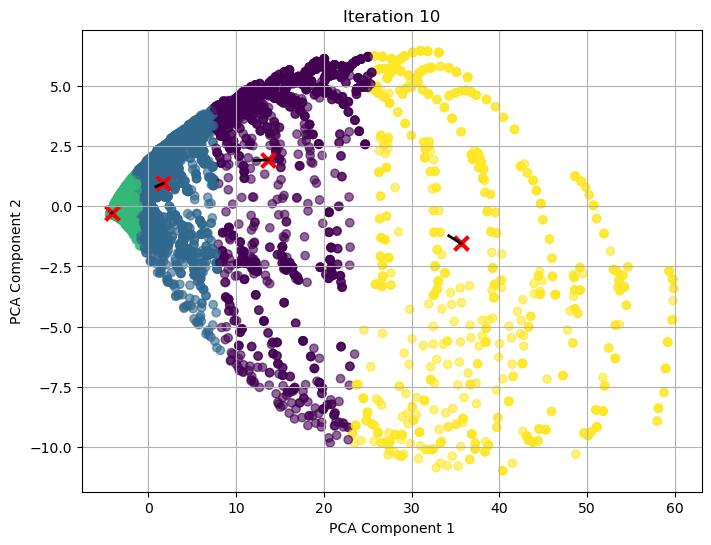

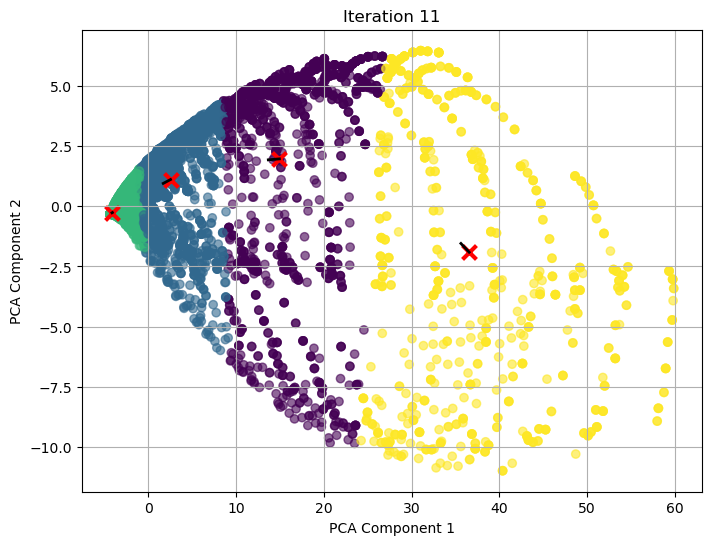

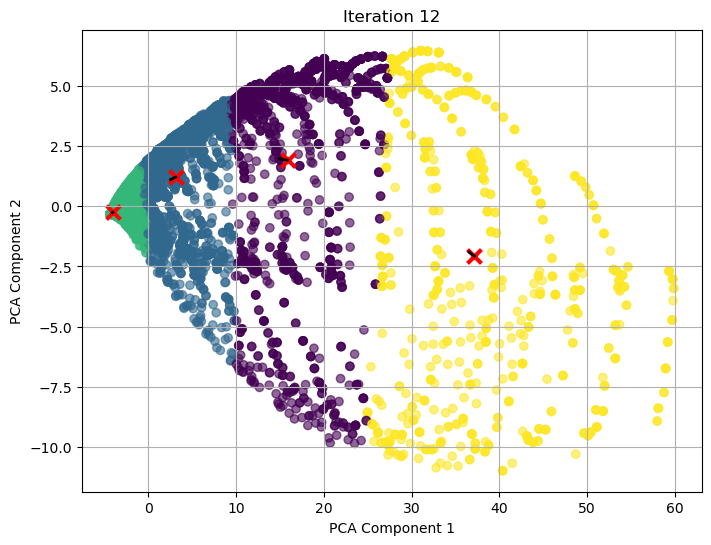

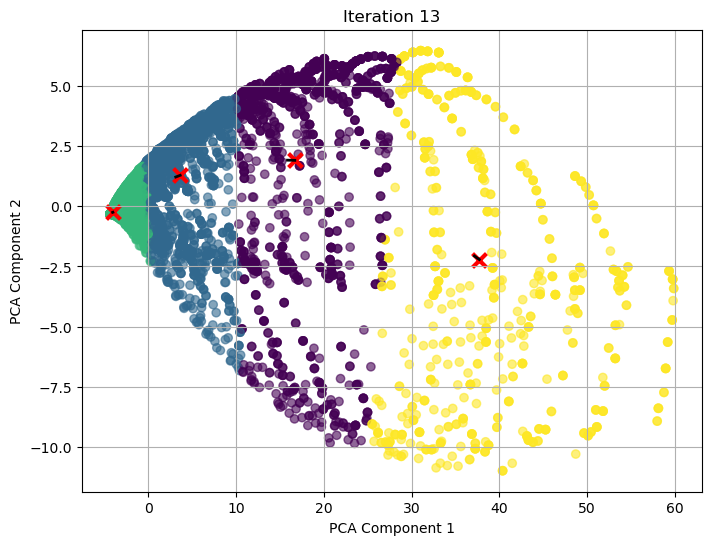

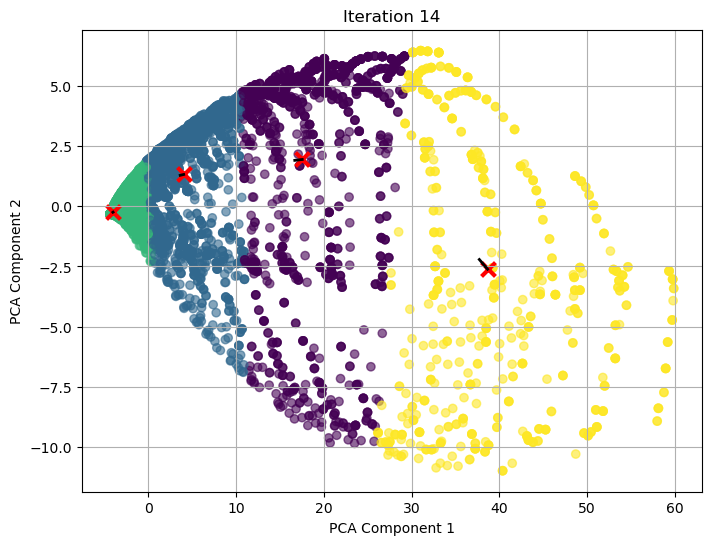

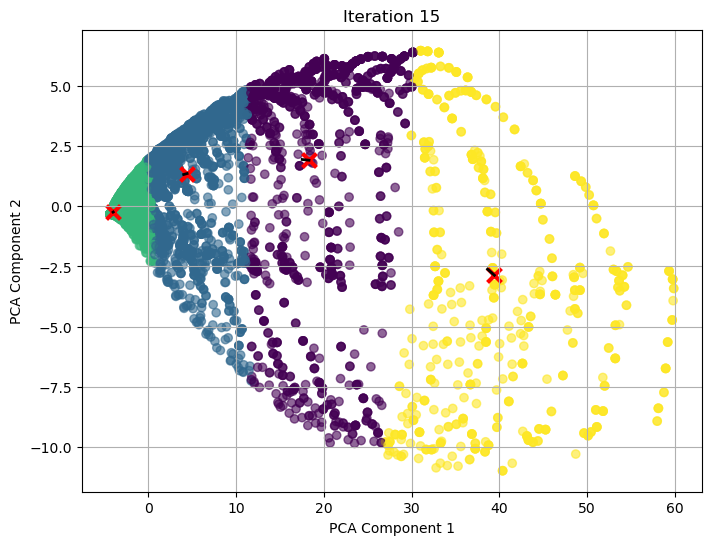

In [78]:
# Option for the user to change the number of iterations
max_iters = 15 # Enter the number of iterations for K-Means Algorithm

# Run K-Means with the optimal number of clusters
centroids_final, train_cluster_labels = run_kMeans(X_train_pca, optimal_k, max_iters=max_iters)

# Add cluster labels to the training dataset
train_BD_train = X_train.copy()
train_BD_train['Cluster'] = train_cluster_labels

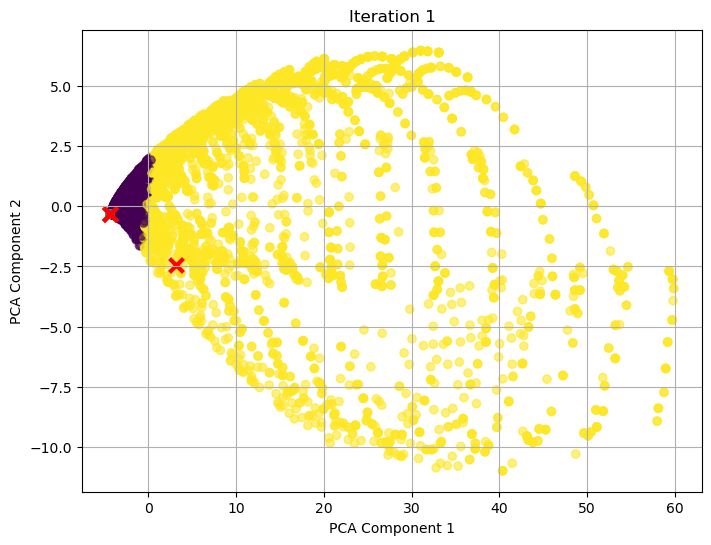

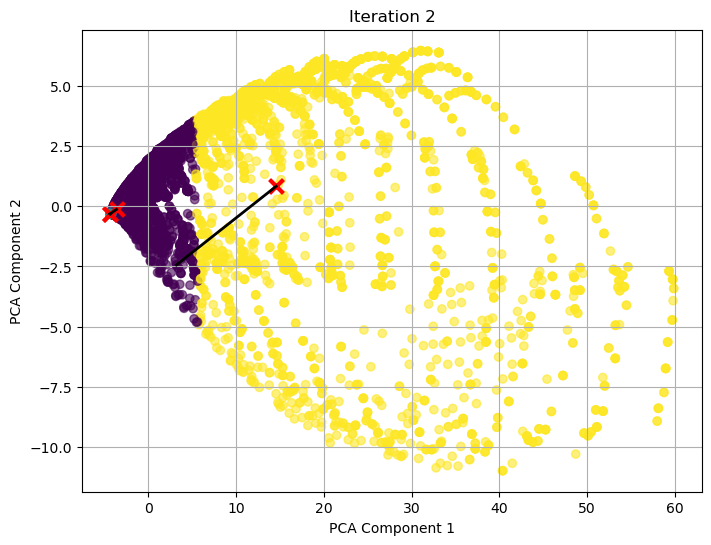

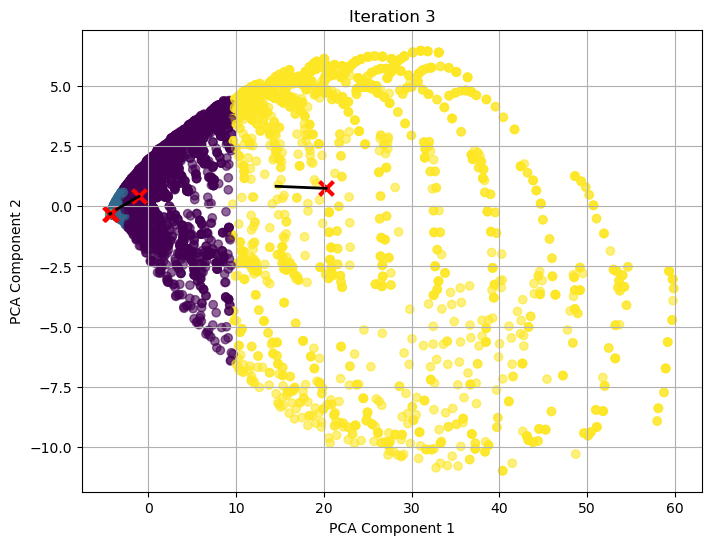

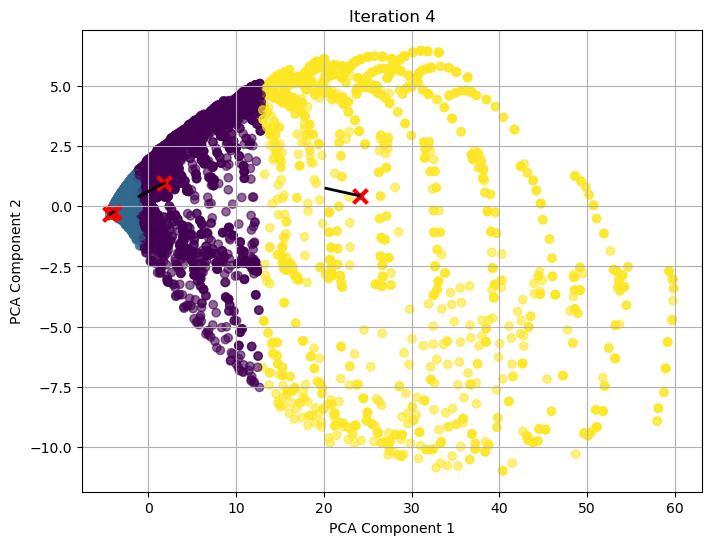

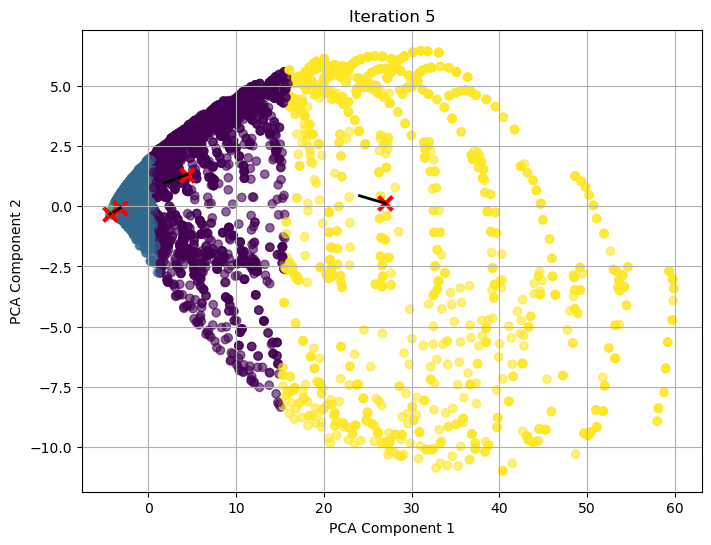

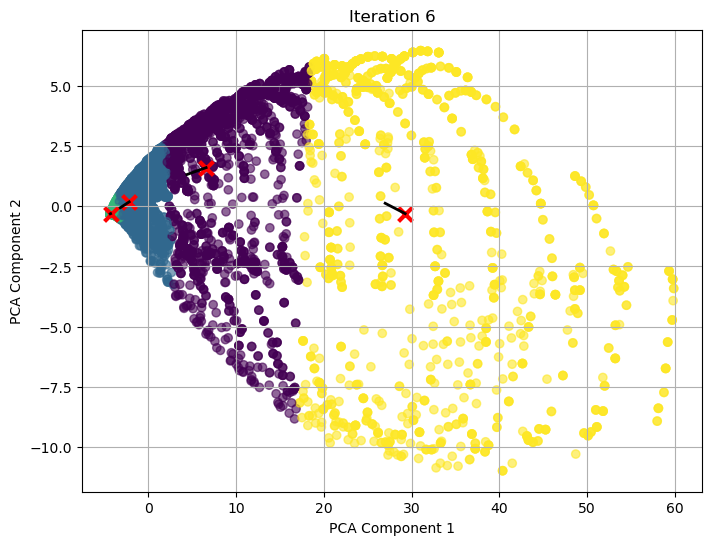

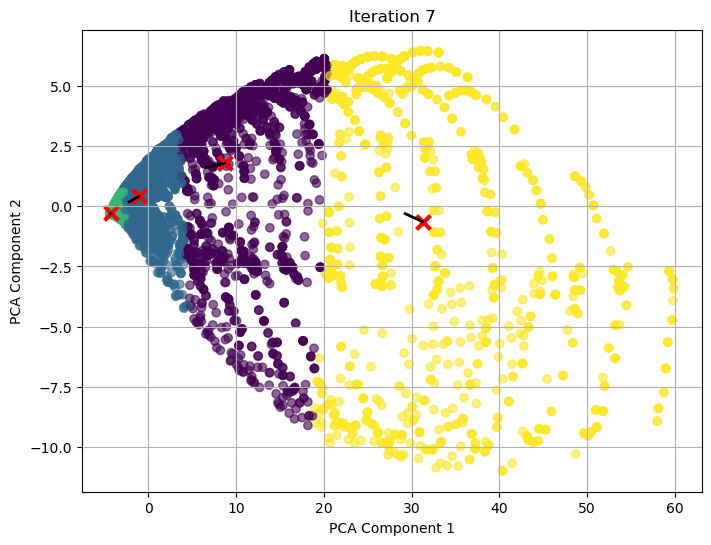

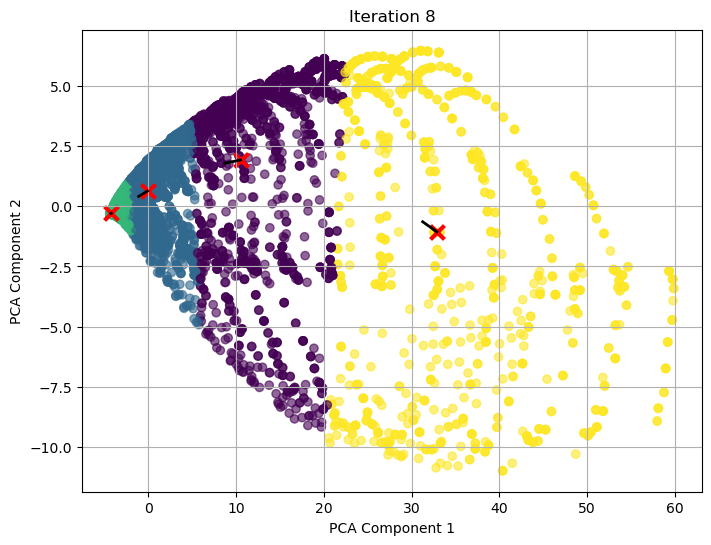

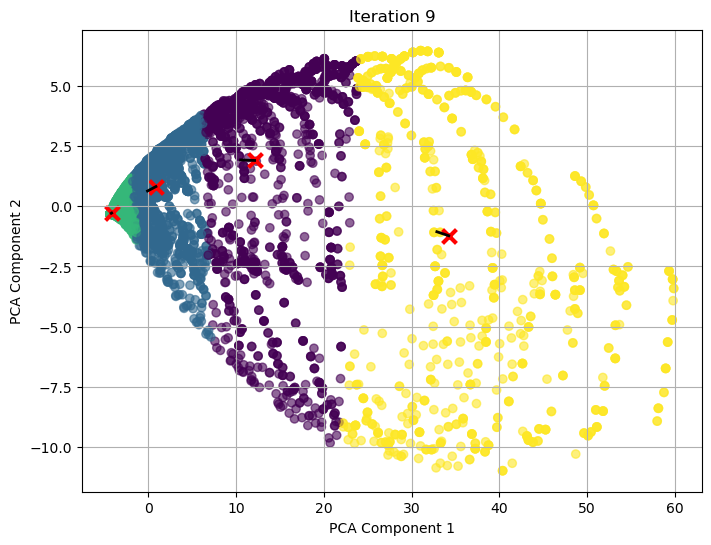

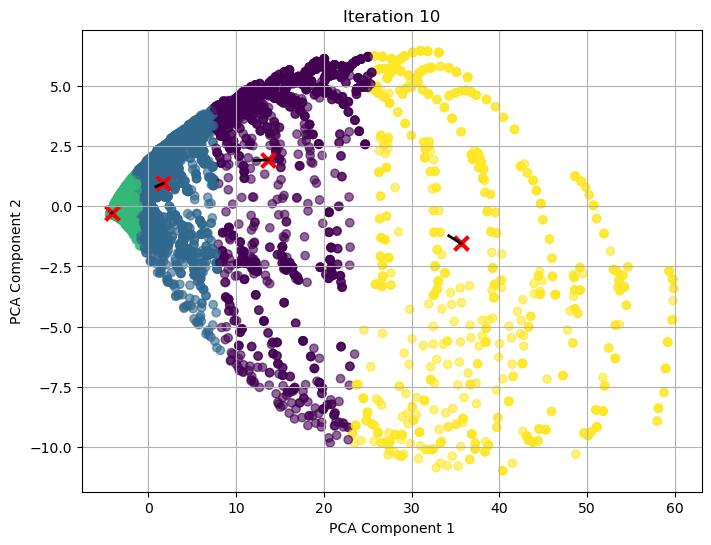

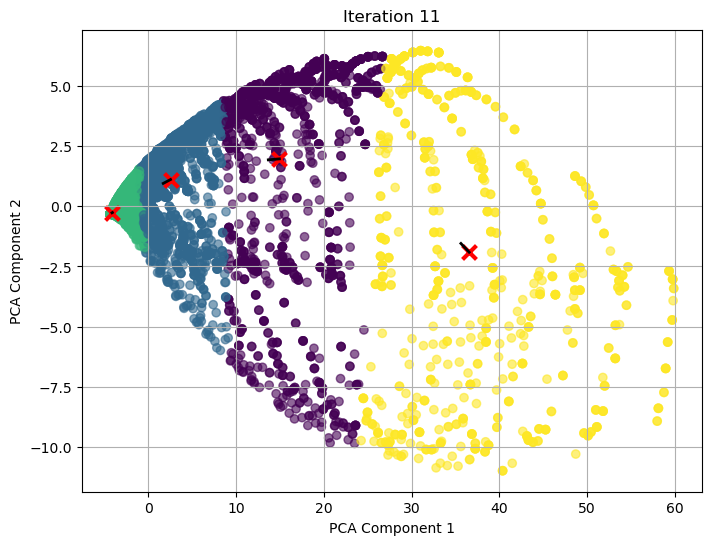

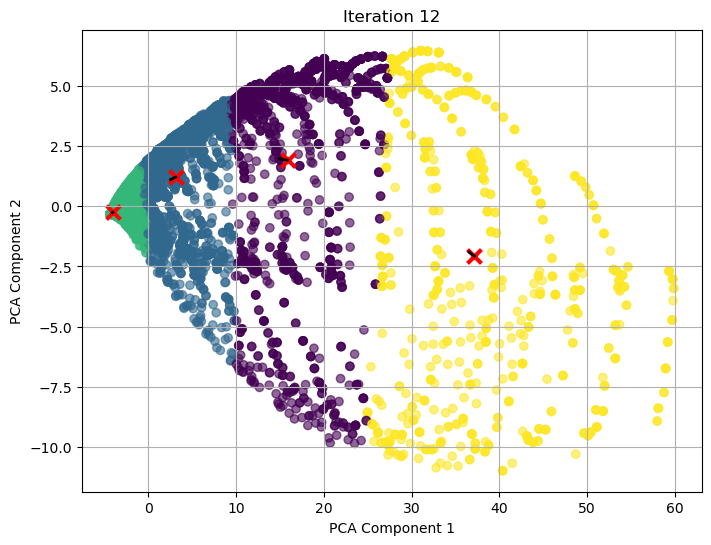

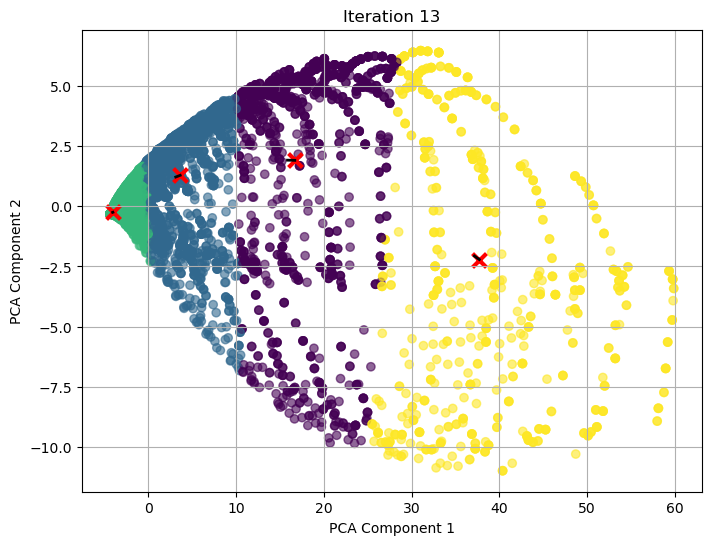

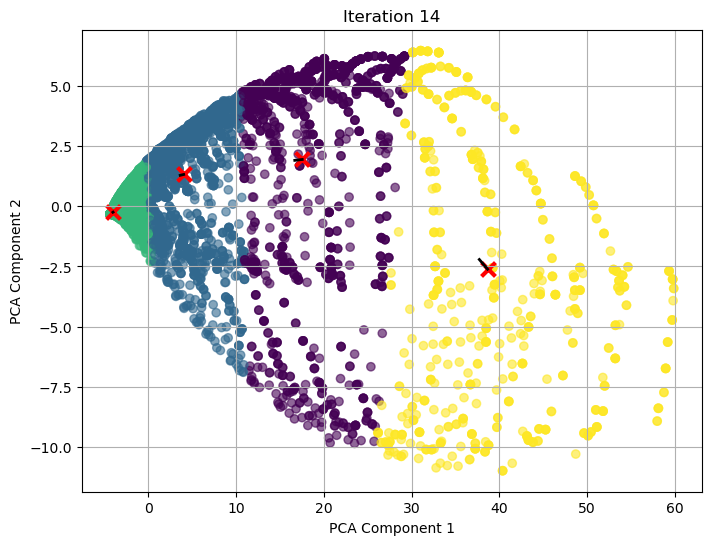

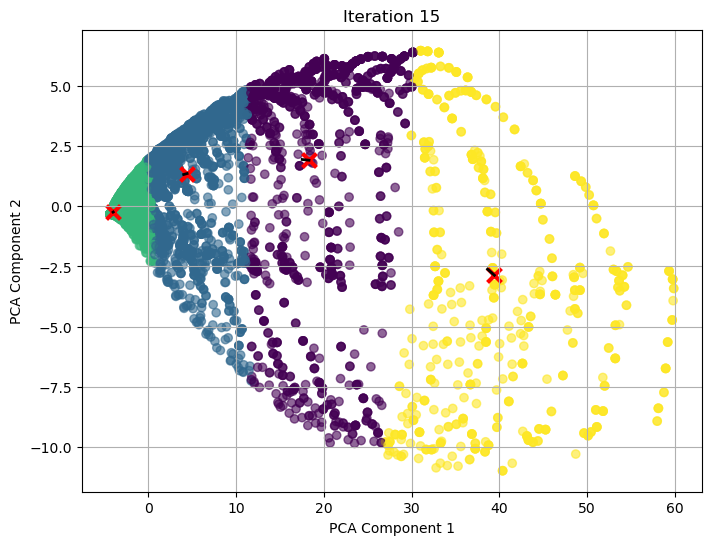

In [79]:
# Run K-Means with the optimal number of clusters
centroids_final, train_cluster_labels = run_kMeans(X_train_pca, optimal_k, max_iters=max_iters)

In [80]:
# Add cluster labels to the training dataset
train_BD_train = X_train.copy()
train_BD_train['Cluster'] = train_cluster_labels

# Merge quartile labels with cluster labels
y_train_quartiles_with_clusters = y_train_quartiles.copy()
y_train_quartiles_with_clusters['Cluster'] = train_cluster_labels

In [81]:
# For each output variable, determine the majority quartile label in each cluster
cluster_quartile_labels = {}
for col in output_names:
    col_quartile = col + '_quartile'
    cluster_mode = y_train_quartiles_with_clusters.groupby('Cluster')[col_quartile].agg(
        lambda x: x.value_counts().index[0]
    )
    cluster_quartile_labels[col] = cluster_mode

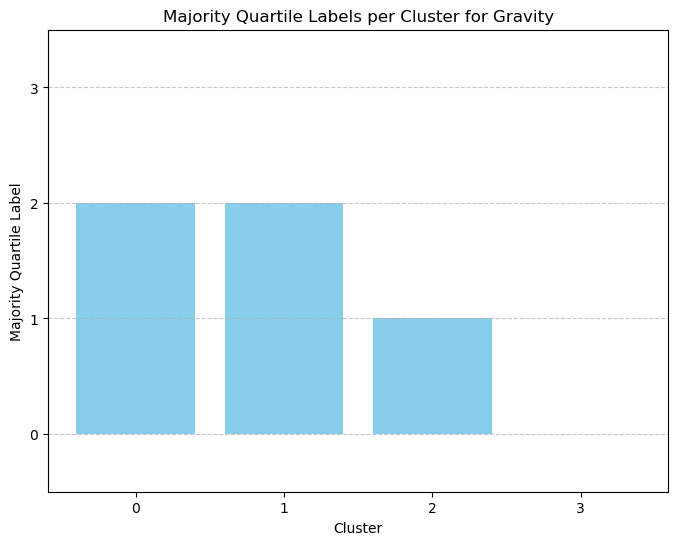

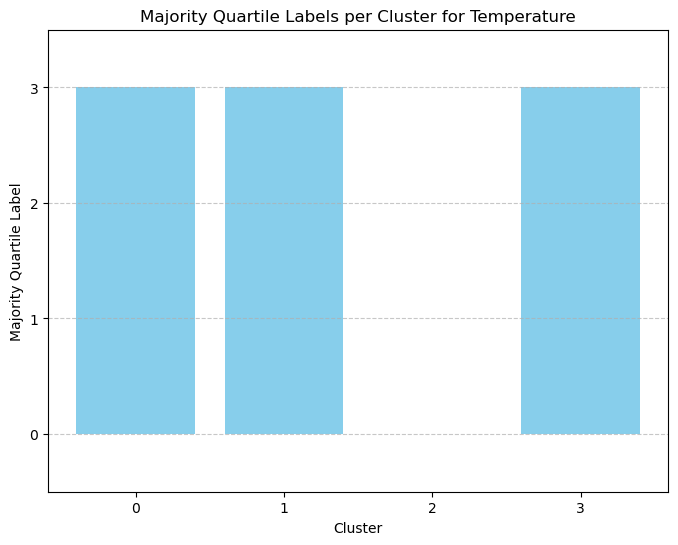

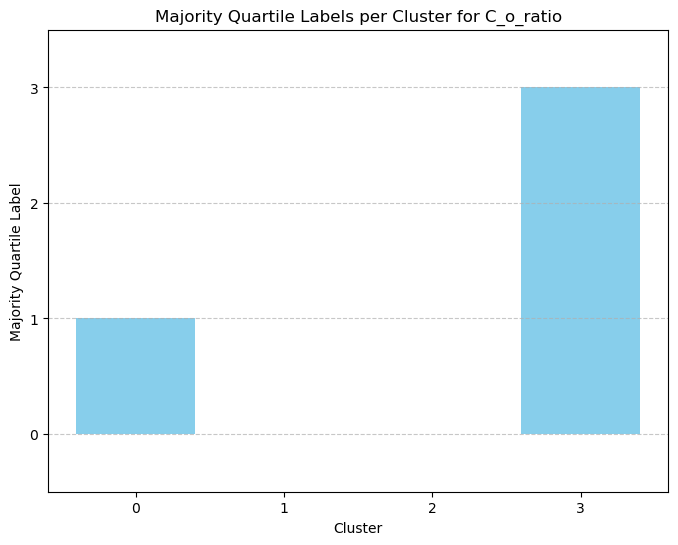

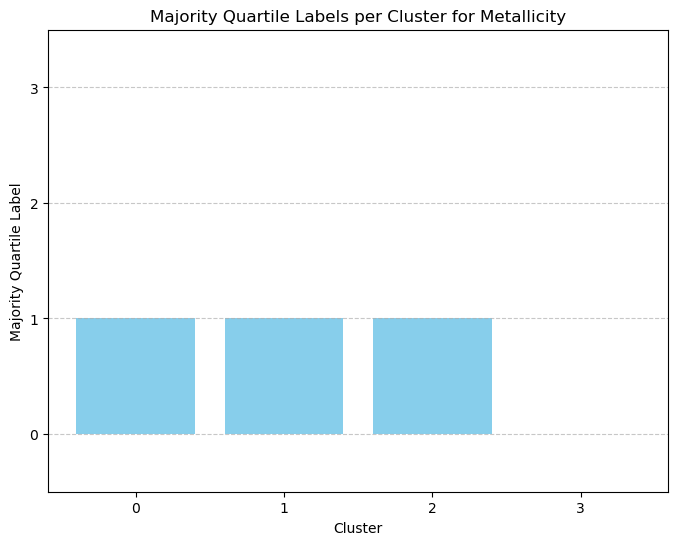

In [82]:
# Plotting the majority quartile labels for each cluster
for col in output_names:
    # Get the majority quartile labels for the output variable
    cluster_mode = cluster_quartile_labels[col]
    clusters = cluster_mode.index
    quartile_labels = cluster_mode.values.astype(int)
    
    plt.figure(figsize=(8, 6))
    plt.bar(clusters, quartile_labels, color='skyblue')
    plt.xlabel('Cluster')
    plt.ylabel('Majority Quartile Label')
    plt.title(f'Majority Quartile Labels per Cluster for {col.capitalize()}')
    plt.xticks(clusters)
    plt.yticks([0, 1, 2, 3])
    plt.ylim(-0.5, 3.5)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Accuracy for gravity on Cross-Validation Data: 25.96%

Accuracy for temperature on Cross-Validation Data: 45.44%

Accuracy for c_o_ratio on Cross-Validation Data: 36.05%

Accuracy for metallicity on Cross-Validation Data: 33.88%

Overall Accuracy on Cross-Validation Data: 35.33%

Accuracy for gravity on Test Data: 26.30%

Accuracy for temperature on Test Data: 44.67%

Accuracy for c_o_ratio on Test Data: 35.72%

Accuracy for metallicity on Test Data: 33.47%

Overall Accuracy on Test Data: 35.04%

Accuracy without PCA: 50.00%
Accuracy with PCA on Test Data: 35.04%


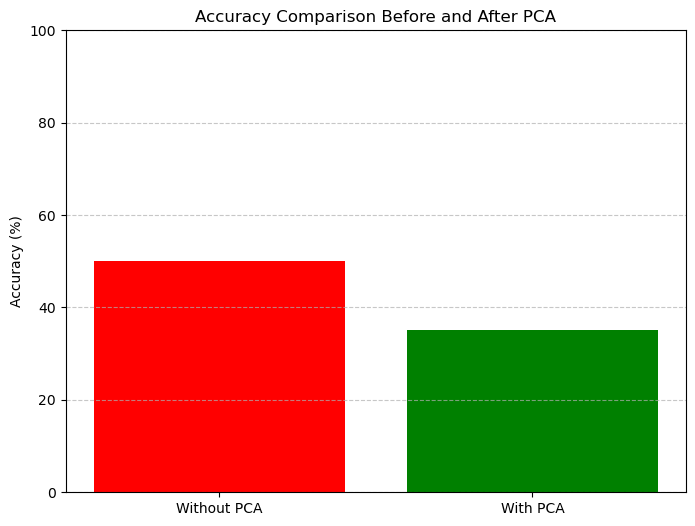

In [83]:
# Function to calculate accuracy and display results
def evaluate_model(X_data_pca, y_data, data_label):
    # Assign clusters to data
    distances = np.linalg.norm(X_data_pca[:, np.newaxis] - centroids_final, axis=2)
    cluster_labels = np.argmin(distances, axis=1)
    
    # Assign predicted quartile labels based on cluster assignments
    y_pred_quartiles = pd.DataFrame(index=y_data.index)
    for col in output_names:
        col_quartile = col + '_quartile'
        # Map cluster labels to quartile labels
        cluster_label_map = cluster_quartile_labels[col].to_dict()
        cluster_labels_series = pd.Series(cluster_labels, index=y_data.index)
        y_pred_quartiles[col_quartile] = cluster_labels_series.map(cluster_label_map)
    
    # Compute true quartile labels for data using training thresholds
    y_true_quartiles, _ = compute_quartile_labels(y_data, quartile_thresholds=quartile_thresholds)
    
    # Calculate prediction accuracy
    accuracy_scores = {}
    for col in output_names:
        col_quartile = col + '_quartile'
        y_true = y_true_quartiles[col_quartile].astype(int)
        y_pred = y_pred_quartiles[col_quartile].astype(int)
        accuracy = accuracy_score(y_true, y_pred)
        accuracy_scores[col] = accuracy
        print(f"\nAccuracy for {col} on {data_label} Data: {accuracy * 100:.2f}%")
    
    # Overall accuracy
    overall_accuracy = np.mean(list(accuracy_scores.values()))
    print(f"\nOverall Accuracy on {data_label} Data: {overall_accuracy * 100:.2f}%")
    return overall_accuracy

# Evaluate model on training data (optional)
# evaluate_model(X_train_pca, y_train, 'Training')

# Evaluate model on cross-validation data
overall_accuracy_cv = evaluate_model(X_cv_pca, y_cv, 'Cross-Validation')

# Evaluate model on test data
overall_accuracy_test = evaluate_model(X_test_pca, y_test, 'Test')

# Compare accuracy before and after PCA (Placeholder values for before PCA)
# Assuming you have the accuracy before PCA stored in a variable `accuracy_before_pca`
accuracy_before_pca = 0.50  # Placeholder value

print(f"\nAccuracy without PCA: {accuracy_before_pca * 100:.2f}%")
print(f"Accuracy with PCA on Test Data: {overall_accuracy_test * 100:.2f}%")

# Plotting accuracy comparison
plt.figure(figsize=(8, 6))
methods = ['Without PCA', 'With PCA']
accuracies = [accuracy_before_pca * 100, overall_accuracy_test * 100]
plt.bar(methods, accuracies, color=['red', 'green'])
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison Before and After PCA')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()